In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/wines_SPA.csv")
data.head()

winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0

In [ ]:
pd.set_option("display.max_rows",None)

In [ ]:
data

winery  \
0                                        Teso La Monja   
1                                               Artadi   
2                                         Vega Sicilia   
3                                         Vega Sicilia   
4                                         Vega Sicilia   
5                                         Vega Sicilia   
6                                         Vega Sicilia   
7                                         Vega Sicilia   
8                                         Vega Sicilia   
9                                         Vega Sicilia   
10                                        Vega Sicilia   
11                                 Pago de Carraovejas   
12                                        Vega Sicilia   
13                                        Vega Sicilia   
14                                         Toro Albala   
15                                 Pago de Carraovejas   
16                                        Vega Sicilia   
17                                        Vega Sicilia   
18                                     Bodegas El Nido   
19                                        Vega Sicilia   
20                                          Valdespino   
21                                        Vega Sicilia   
22                                   Dominio de Pingus   
23                                         Toro Albala   
24                                        Vega Sicilia   
25                                        Vega Sicilia   
26                                         Toro Albala   
27                                     Alvaro Palacios   
28                                        Vega Sicilia   
29                                        Vega Sicilia   
30                                             Ordonez   
31                                        Vega Sicilia   
32                                         Toro Albala   
33                                    Bodegas Valduero   
34                                         Vina Sastre   
35                                       Teso La Monja   
36                                   Dominio de Pingus   
37                                       Teso La Monja   
38                                     Alvaro Palacios   
39                                    Sierra Cantabria   
40                                       Teso La Monja   
41                                     Alvaro Palacios   
42                                       Teso La Monja   
43                        Descendientes de J. Palacios   
44                                       La Rioja Alta   
45                                     Alvaro Palacios   
46                                        Vega Sicilia   
47                                        Vega Sicilia   
48                                        Vega Sicilia   
49                                        Vega Sicilia   
50                                        Vega Sicilia   
51                                        Vega Sicilia   
52                                        Vega Sicilia   
53                                        Vega Sicilia   
54                                        Vega Sicilia   
55                                        Vega Sicilia   
56                                        Vega Sicilia   
57                                        Vega Sicilia   
58                                        Vega Sicilia   
59                                        Vega Sicilia   
60                                        Vega Sicilia   
61                                        Vega Sicilia   
62                                        Vega Sicilia   
63                                        Vega Sicilia   
64                                        Vega Sicilia   
65                                 Pago de Carraovejas   
66                                        Vega Sicilia   
67                                        Vega Sicilia   
68                                        Vega

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [ ]:
data.describe()

rating   num_reviews        price         body      acidity
count  7500.000000   7500.000000  7500.000000  6331.000000  6331.000000
mean      4.254933    451.109067    60.095822     4.158427     2.946612
std       0.118029    723.001856   150.356676     0.583352     0.248202
min       4.200000     25.000000     4.990000     2.000000     1.000000
25%       4.200000    389.000000    18.900000     4.000000     3.000000
50%       4.200000    404.000000    28.530000     4.000000     3.000000
75%       4.200000    415.000000    51.350000     5.000000     3.000000
max       4.900000  32624.000000  3119.080000     5.000000     3.000000

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer_cols = ['type', 'body', 'acidity', 'year']
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(data[imputer_cols])
data[imputer_cols] = imputer.transform(data[imputer_cols])


In [ ]:
data.isnull().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [ ]:
#Dealing with nulls year column
data['year'].fillna(2017,inplace=True)

#Transforming qualitative to quantitatives
data['year'] = data['year'].astype(str).str.replace('N.V.','2017').astype(int)

<Figure size 2000x1000 with 0 Axes>

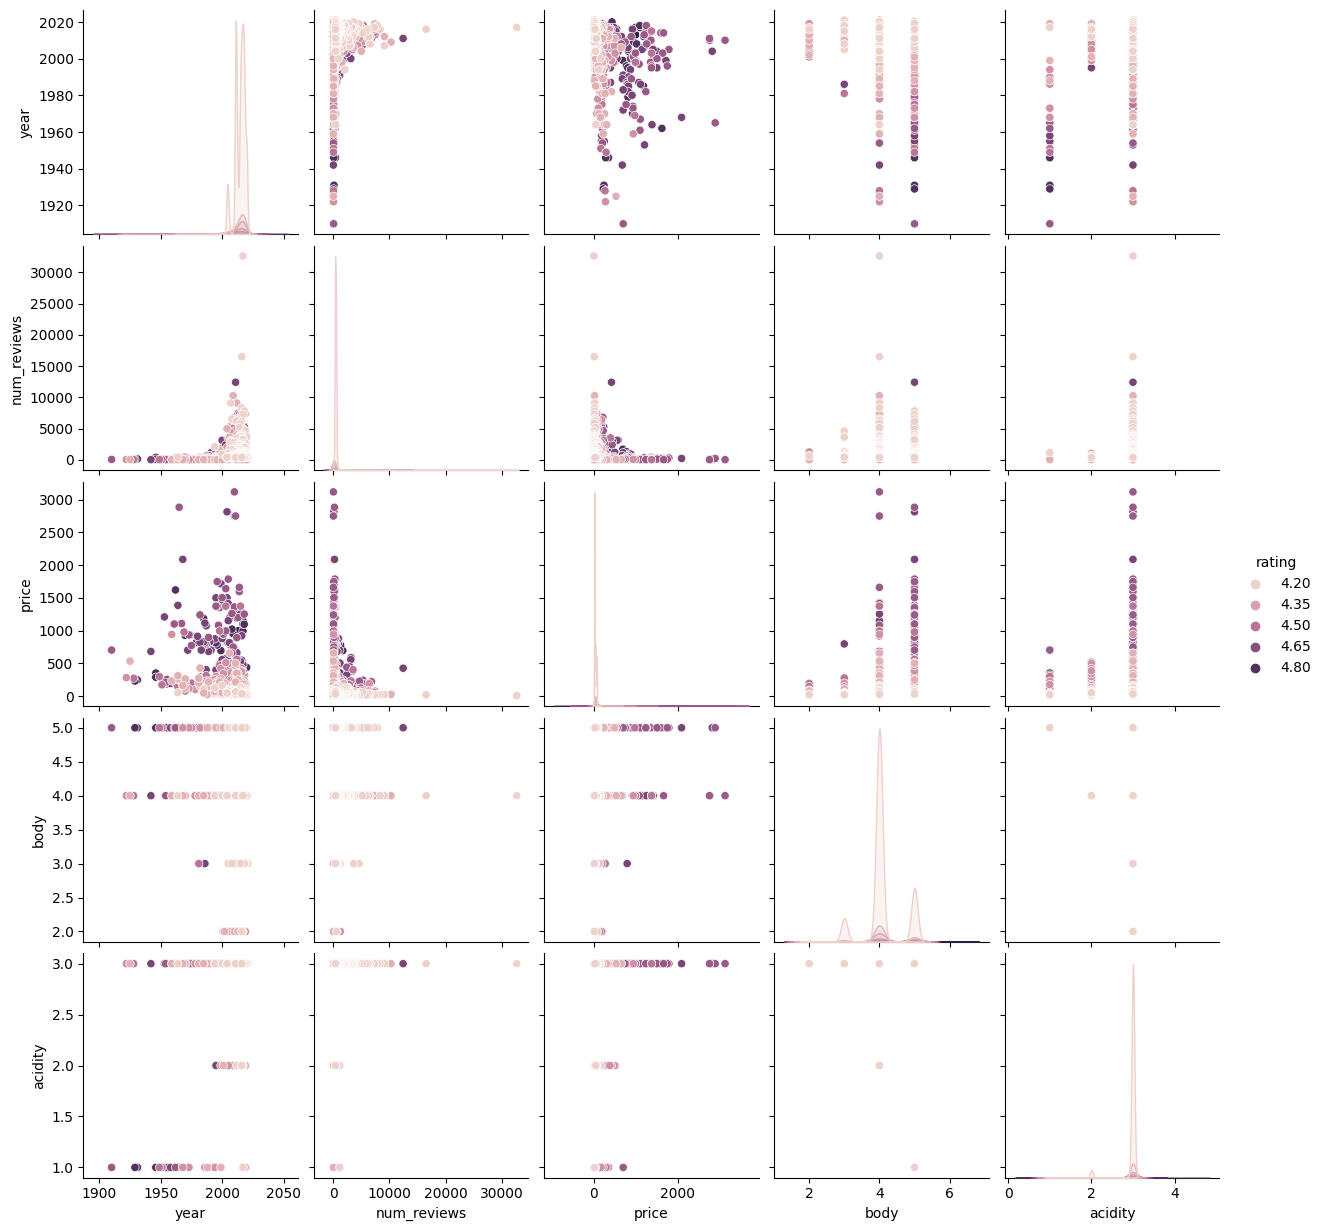

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(data,hue='rating')

<Axes: xlabel='year', ylabel='acidity'>

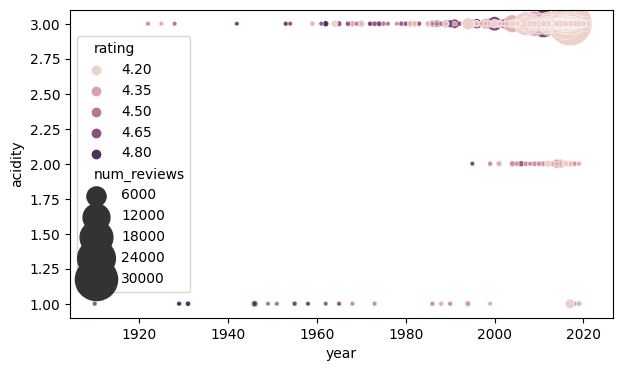

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=data, x='year', y='acidity',hue='rating',size='num_reviews',sizes=(10,1000))

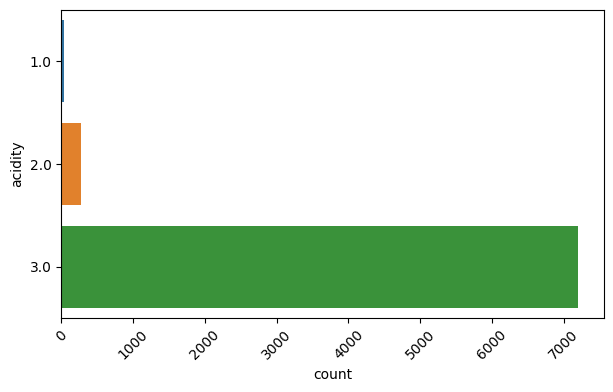

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(y=data['acidity'])
plt.xticks(rotation=45)
plt.show()

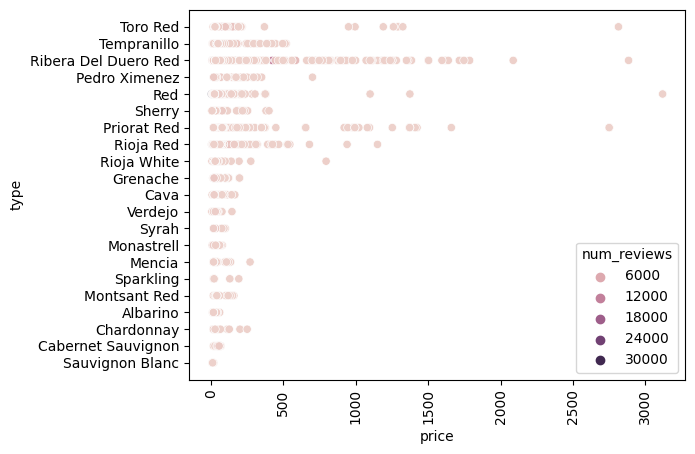

In [ ]:
sns.scatterplot(data=data, y='type', x='price', hue='num_reviews')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for i in data:
    if data[i].dtypes == 'object':
        data[i] = LabelEncoder().fit_transform(data[i])

In [ ]:
data.head()

winery  wine  year  rating  num_reviews  country  region   price  type  \
0     422   759  2013     4.9           58        0      69  995.00    19   
1      33   819  2018     4.9           31        0      74  313.50    18   
2     447   778  2009     4.8         1793        0      57  324.95    11   
3     447   778  1999     4.8         1705        0      57  692.96    11   
4     447   778  1996     4.8         1309        0      57  778.06    11   

   body  acidity  
0     3        2  
1     2        1  
2     3        2  
3     3        2  
4     3        2

In [ ]:
data['acidity'].value_counts()

2    7197
1     268
0      35
Name: acidity, dtype: int64

In [ ]:
x = data.drop('acidity', axis=1)
y = data['acidity']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,mean_squared_error

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Training accuracy for Logistic Regression: ", round(lr.score(x_train, y_train)*100), "%")
print("Testing accuracy for Logistic Regression:", round(lr_acc*100, 2), "%")
confusion_matrix(y_test,lr_pred)

Training accuracy for Logistic Regression:  99 %
Testing accuracy for Logistic Regression: 98.67 %


array([[   0,    0,   11],
       [   0,   67,   10],
       [   0,    9, 2153]])

MSE:  0.028
RMSE:  0.014


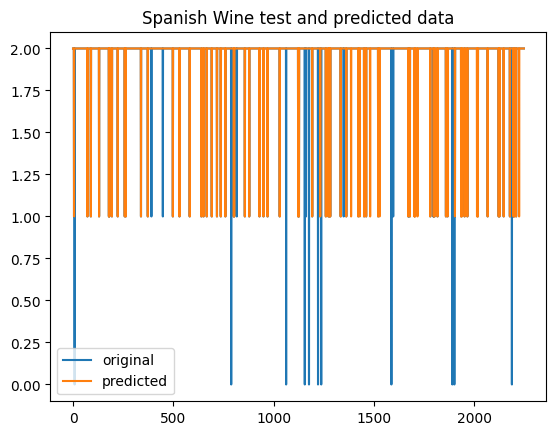

In [ ]:
mse = mean_squared_error(y_test, lr_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, lr_pred, label="predicted")
plt.title("Spanish Wine test and predicted data")
plt.legend()
plt.show()

In [ ]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.88      0.87      0.88        77
           2       0.99      1.00      0.99      2162

    accuracy                           0.99      2250
   macro avg       0.62      0.62      0.62      2250
weighted avg       0.98      0.99      0.98      2250



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
accuracy_score(y_test, knn_pred)*100


98.8

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
accuracy_score(y_test, rfc_pred)*100

99.6

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_test)
accuracy_score(y_test, gbc_pred)*100

99.6888888888889

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity=0)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
accuracy_score(y_test, xgb_pred)*100

99.73333333333333

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)
accuracy_score(y_test, dtc_pred)*100

99.6

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
accuracy_score(y_test,svc_pred)

0.9608888888888889